In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam

In [4]:
# Load data
data = pd.read_csv('processed_Infilteration_2.csv')


In [5]:
# Separate features and labels
X = data.drop(['Label','Timestamp'], axis=1)
y = data['Label']

In [6]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [9]:
# Compute correlation matrix
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

C:\Windows\Temp\ipykernel_18808\1729368701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


In [10]:
# Select top 15 features based on correlation with label
best_features_15 = upper_tri.nlargest(15, 'Label')['Label'].index.tolist()

# Select top 20 features based on correlation with label
best_features_20 = upper_tri.nlargest(20, 'Label')['Label'].index.tolist()

# Select top 30 features based on correlation with label
best_features_30 = upper_tri.nlargest(30, 'Label')['Label'].index.tolist()

Feature set: ['Bwd Pkts/s', 'Fwd Pkts/s', 'Init Bwd Win Byts', 'Fwd Pkt Len Mean', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Fwd URG Flags', 'CWE Flag Count', 'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Dst Port', 'Fwd IAT Mean', 'Fwd IAT Min', 'Flow IAT Mean', 'PSH Flag Cnt']
Accuracy: 0.7325271251461218


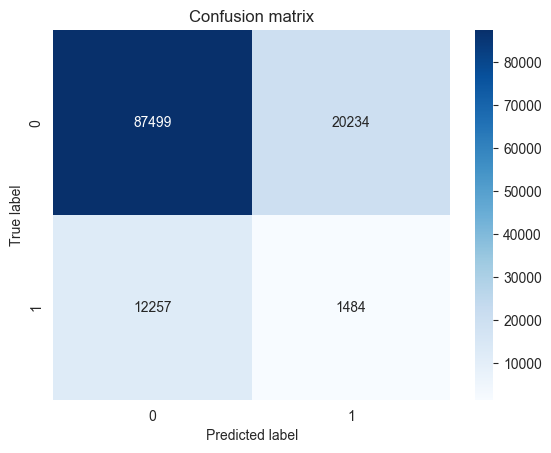

Feature set: ['Bwd Pkts/s', 'Fwd Pkts/s', 'Init Bwd Win Byts', 'Fwd Pkt Len Mean', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Fwd URG Flags', 'CWE Flag Count', 'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Dst Port', 'Fwd IAT Mean', 'Fwd IAT Min', 'Flow IAT Mean', 'PSH Flag Cnt', 'Flow IAT Min', 'ACK Flag Cnt', 'FIN Flag Cnt', 'Pkt Len Max', 'Fwd IAT Max']
Accuracy: 0.7383637650855327


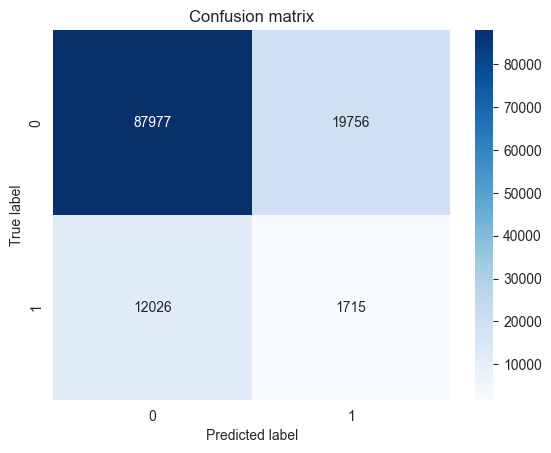

Feature set: ['Bwd Pkts/s', 'Fwd Pkts/s', 'Init Bwd Win Byts', 'Fwd Pkt Len Mean', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Fwd URG Flags', 'CWE Flag Count', 'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Dst Port', 'Fwd IAT Mean', 'Fwd IAT Min', 'Flow IAT Mean', 'PSH Flag Cnt', 'Flow IAT Min', 'ACK Flag Cnt', 'FIN Flag Cnt', 'Pkt Len Max', 'Fwd IAT Max', 'Pkt Len Mean', 'Pkt Size Avg', 'Bwd Pkt Len Min', 'Flow IAT Max', 'Fwd Pkt Len Min', 'Bwd Pkt Len Max', 'Idle Max', 'Pkt Len Min', 'Idle Min', 'Idle Mean']
Accuracy: 0.7370548430116732


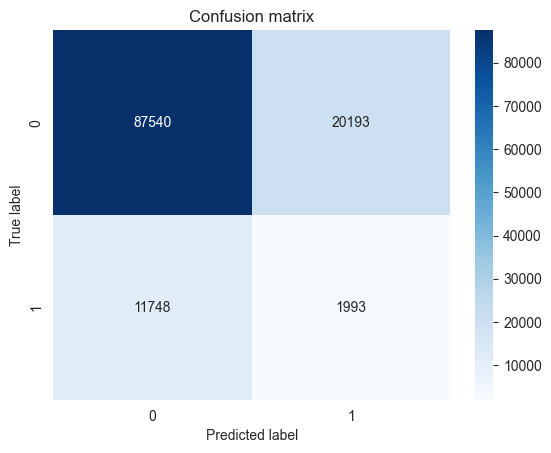

In [11]:
# Iterate through feature sets and train Random Forest model
for feature_set in [best_features_15, best_features_20, best_features_30]:
    # Convert feature names to indices
    feature_indices = [X.columns.get_loc(feature_name) for feature_name in feature_set]
    X_train_subset = X_train[:, np.array(feature_indices)]
    X_test_subset = X_test[:, np.array(feature_indices)]

    # Create and fit Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_subset, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    print('Feature set:', feature_set)
    print('Accuracy:', accuracy)
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()